# Applying K-Nearest Neighbours and Decision Trees

## Table of contents
 - [1 Load the libraries](#1-Load)
 - [2 Data curation](#2-Data)
    * [2.1 Data retrieval](#2-1-Retrieval)
    * [2.2 Clean data and extract numerical features](#2-2-Clean)
 - [3 Data exploration](#3-Data)
    * [3.1 Feature extraction from text documents](#3-1-Feature)
    * [3.2 Get feature vectors](#3-2-Get)
 - [4 Data modelling ](#4-Data)
    * [4.1 KNN and Hyperparameter tuning](#4-1)
    * [4.2 Apply grid search to KNN ](#4-2)
    * [4.3 Train and evaluate the KNN classifier ](#4-3)   
    * [4.4 KNN classifier evaluation](#4-4)    
    * [4.5 Metrics for evaluation of KNN](#4-5)    
    * [4.6 Train and evaluate KNN (SMOTE)](#4-6)    
    * [4.7 Train KNN (SMOTE) using hyperparameter tuning](#4-7)    
    * [4.8 KNN (SMOTE) classifier evaluation](#4-8)      
    * [4.9 Metrics for evaluation of KNN (SMOTE)](#4-9)      
 - [5 Decision Tree and Hyperparameter Tuning](#5-Decision)
    * [5.1 Apply grid search to Decision Tree](#5-1)
    * [5.2 Train and evaluate the Decision Tree classifier ](#5-2)
    * [5.3 Decision Tree classifier evaluation](#5-3)   
    * [5.4 Metrics for evaluation of Decision Tree](#5-4)    
    * [5.5 Train and evaluate Decision Tree using SMOTE](#5-5)    
    * [5.6 Decision Tree (SMOTE) classifier evaluation](#5-6)    
    * [5.7 Metrics for evaluation of Decision Tree (SMOTE)](#5-7)    
 - [6 Results of the implemented classifiers ](#6-Results)   

# 1 Load the libraries <a name="1-Load"></a>

To begin our practical exercise, first load the libraries. Run the code below. 

In [1]:
import os

import zipfile

import io

import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split 

from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import accuracy_score,balanced_accuracy_score,confusion_matrix, ConfusionMatrixDisplay 

from imblearn.over_sampling import SMOTE 

import ssl

import nltk 

from nltk.corpus import stopwords 

from nltk.tokenize import word_tokenize 

# 2 Data curation <a name="2-Data"></a>

We’ll now go through the steps of data curation we discussed earlier in the week, showing how these can be applied to the Enron dataset and practically executed in code.  

## 2.1 Data retrieval <a name="2-1-Retrieval"></a>

Load the Enron dataset (spams and hams) ignoring characters that are not found in encoding utf8 (meaning we filter characters that are not part of the Latin alphabet). Run the code below. 

**For spam:**

In [2]:
# make sure folder location is correct on vocareum or your machine
archive = zipfile.ZipFile('spam.zip', 'r')
names=archive.namelist()
files_names = archive.namelist()
enron1_spam = [str(archive.read(item), encoding='utf8', errors='ignore') for item in files_names]

#show the first 10 spam

enron1_spam[0:10]



['Subject: ^ . pe , nis s ^ ize mat ; ters ! yhvqbvdboevkcd\r\nbriababhdpr frdjvdbesk cdpizacqjkufx hfkosxcymgftzd wdyiwpbqipv xxieqncfpa\r\nthe only solution to penis enlargement\r\nfxbekdcaolk gsiaagcrhyp\r\nlimited offer : add at least 3 inches or get your money back !\r\nrlaegydzfb ylbafsepgjv\r\nwe are so sure our product works we are willing to prove it by offering a free trial bottle + a 100 % money back guarantee upon purchase if you are not satisfied with the results .\r\n- - - > click here to learn more - - -\r\nalso check out our * brand new * product : penis enlargement patches\r\ncomes with the 100 % money back warranty as well !\r\neqiupgbbaxz gogqkkdpbdo\r\nigjohodzauuuu yreliodctrin\r\ncbywdvdthl nogsvvbnwug\r\nno more offers\r\n',
 'Subject: re : rdd , the auxiliary iturean\r\nfree cable @ tv\r\ndabble bam servomechanism ferret canopy bookcase befog seductive elapse ballard daphne acrylate deride decadent desolate else sequestration condition ligament ornately yaqui gi

**For ham:**

In [3]:
# make sure folder location is correct on vocareum or your machine
archive = zipfile.ZipFile('ham.zip', 'r')

files_names = archive.namelist()
enron1_ham = [str(archive.read(item), encoding='utf8', errors='ignore') for item in files_names]

#show the first 10 spam

enron1_ham[0:10]


['Subject: entex transistion\r\nthe purpose of the email is to recap the kickoff meeting held on yesterday\r\nwith members from commercial and volume managment concernig the entex account :\r\neffective january 2000 , thu nguyen ( x 37159 ) in the volume managment group ,\r\nwill take over the responsibility of allocating the entex contracts . howard\r\nand thu began some training this month and will continue to transition the\r\naccount over the next few months . entex will be thu \' s primary account\r\nespecially during these first few months as she learns the allocations\r\nprocess and the contracts .\r\nhoward will continue with his lead responsibilites within the group and be\r\navailable for questions or as a backup , if necessary ( thanks howard for all\r\nyour hard work on the account this year ! ) .\r\nin the initial phases of this transistion , i would like to organize an entex\r\n" account " team . the team ( members from front office to back office ) would\r\nmeet at some 

## 2.1 Clean data and extract numerical features <a name="2-2-Clean"></a>

### 2.2.1 Convert everything to lower case

To clean a textual dataset for later analysis, we need to ensure we remove any upper-case characters. Run the code below.  

**For spam:**

In [4]:
enron1_spam_preparation = [email.lower() for email in enron1_spam] 

#show the first 10 spam 

enron1_spam_preparation[0:10] 

['subject: ^ . pe , nis s ^ ize mat ; ters ! yhvqbvdboevkcd\r\nbriababhdpr frdjvdbesk cdpizacqjkufx hfkosxcymgftzd wdyiwpbqipv xxieqncfpa\r\nthe only solution to penis enlargement\r\nfxbekdcaolk gsiaagcrhyp\r\nlimited offer : add at least 3 inches or get your money back !\r\nrlaegydzfb ylbafsepgjv\r\nwe are so sure our product works we are willing to prove it by offering a free trial bottle + a 100 % money back guarantee upon purchase if you are not satisfied with the results .\r\n- - - > click here to learn more - - -\r\nalso check out our * brand new * product : penis enlargement patches\r\ncomes with the 100 % money back warranty as well !\r\neqiupgbbaxz gogqkkdpbdo\r\nigjohodzauuuu yreliodctrin\r\ncbywdvdthl nogsvvbnwug\r\nno more offers\r\n',
 'subject: re : rdd , the auxiliary iturean\r\nfree cable @ tv\r\ndabble bam servomechanism ferret canopy bookcase befog seductive elapse ballard daphne acrylate deride decadent desolate else sequestration condition ligament ornately yaqui gi

**For ham:**

In [5]:
enron1_ham_preparation = [email.lower() for email in enron1_ham] 

#show the first 10 ham 

enron1_ham_preparation[0:10] 

['subject: entex transistion\r\nthe purpose of the email is to recap the kickoff meeting held on yesterday\r\nwith members from commercial and volume managment concernig the entex account :\r\neffective january 2000 , thu nguyen ( x 37159 ) in the volume managment group ,\r\nwill take over the responsibility of allocating the entex contracts . howard\r\nand thu began some training this month and will continue to transition the\r\naccount over the next few months . entex will be thu \' s primary account\r\nespecially during these first few months as she learns the allocations\r\nprocess and the contracts .\r\nhoward will continue with his lead responsibilites within the group and be\r\navailable for questions or as a backup , if necessary ( thanks howard for all\r\nyour hard work on the account this year ! ) .\r\nin the initial phases of this transistion , i would like to organize an entex\r\n" account " team . the team ( members from front office to back office ) would\r\nmeet at some 

### 2.2.2 Tokenisation 

Next we create tokens (individual words) from our email data. Run the code below. 

In [6]:
## disabling SSl check to download the package "punkt"
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass 
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
# load tokens (words) 

nltk.download('punkt') 

[nltk_data] Downloading package punkt to /mnt/vocwork4/work/eee_W_2725
[nltk_data]     895/asn2001892_23/asn2001893_1/work/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**For spam:**

In [7]:
enron1_spam_preparation =[word_tokenize(email) for email in enron1_spam_preparation] 

print(enron1_spam_preparation[0]) 

['subject', ':', '^', '.', 'pe', ',', 'nis', 's', '^', 'ize', 'mat', ';', 'ters', '!', 'yhvqbvdboevkcd', 'briababhdpr', 'frdjvdbesk', 'cdpizacqjkufx', 'hfkosxcymgftzd', 'wdyiwpbqipv', 'xxieqncfpa', 'the', 'only', 'solution', 'to', 'penis', 'enlargement', 'fxbekdcaolk', 'gsiaagcrhyp', 'limited', 'offer', ':', 'add', 'at', 'least', '3', 'inches', 'or', 'get', 'your', 'money', 'back', '!', 'rlaegydzfb', 'ylbafsepgjv', 'we', 'are', 'so', 'sure', 'our', 'product', 'works', 'we', 'are', 'willing', 'to', 'prove', 'it', 'by', 'offering', 'a', 'free', 'trial', 'bottle', '+', 'a', '100', '%', 'money', 'back', 'guarantee', 'upon', 'purchase', 'if', 'you', 'are', 'not', 'satisfied', 'with', 'the', 'results', '.', '-', '-', '-', '>', 'click', 'here', 'to', 'learn', 'more', '-', '-', '-', 'also', 'check', 'out', 'our', '*', 'brand', 'new', '*', 'product', ':', 'penis', 'enlargement', 'patches', 'comes', 'with', 'the', '100', '%', 'money', 'back', 'warranty', 'as', 'well', '!', 'eqiupgbbaxz', 'gogqkk

**For ham:**

In [8]:
enron1_ham_preparation =[word_tokenize(email) for email in enron1_ham_preparation] 

print(enron1_ham_preparation[0]) 

['subject', ':', 'entex', 'transistion', 'the', 'purpose', 'of', 'the', 'email', 'is', 'to', 'recap', 'the', 'kickoff', 'meeting', 'held', 'on', 'yesterday', 'with', 'members', 'from', 'commercial', 'and', 'volume', 'managment', 'concernig', 'the', 'entex', 'account', ':', 'effective', 'january', '2000', ',', 'thu', 'nguyen', '(', 'x', '37159', ')', 'in', 'the', 'volume', 'managment', 'group', ',', 'will', 'take', 'over', 'the', 'responsibility', 'of', 'allocating', 'the', 'entex', 'contracts', '.', 'howard', 'and', 'thu', 'began', 'some', 'training', 'this', 'month', 'and', 'will', 'continue', 'to', 'transition', 'the', 'account', 'over', 'the', 'next', 'few', 'months', '.', 'entex', 'will', 'be', 'thu', "'", 's', 'primary', 'account', 'especially', 'during', 'these', 'first', 'few', 'months', 'as', 'she', 'learns', 'the', 'allocations', 'process', 'and', 'the', 'contracts', '.', 'howard', 'will', 'continue', 'with', 'his', 'lead', 'responsibilites', 'within', 'the', 'group', 'and', '

### 2.2.3 Removing stopwords 

To remove insignificant words from our dataset, we can first load stopwords (a predefined set of words to exclude from analysis such as `the`, `a`, `it`, etc). Run the code below. 

In [9]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /mnt/vocwork4/work/eee_W_
[nltk_data]     2725895/asn2001892_23/asn2001893_1/work/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Next we create a list of the stopwords as they appear in our dataset. Run the code below.

In [10]:
list_stopwords=stopwords.words('english') 

list_stopwords[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

**For spam:**

In [11]:
enron1_spam_preparation= [[word for word in email if not word in list_stopwords] for email in enron1_spam_preparation] 

print(enron1_spam_preparation[0]) 

['subject', ':', '^', '.', 'pe', ',', 'nis', '^', 'ize', 'mat', ';', 'ters', '!', 'yhvqbvdboevkcd', 'briababhdpr', 'frdjvdbesk', 'cdpizacqjkufx', 'hfkosxcymgftzd', 'wdyiwpbqipv', 'xxieqncfpa', 'solution', 'penis', 'enlargement', 'fxbekdcaolk', 'gsiaagcrhyp', 'limited', 'offer', ':', 'add', 'least', '3', 'inches', 'get', 'money', 'back', '!', 'rlaegydzfb', 'ylbafsepgjv', 'sure', 'product', 'works', 'willing', 'prove', 'offering', 'free', 'trial', 'bottle', '+', '100', '%', 'money', 'back', 'guarantee', 'upon', 'purchase', 'satisfied', 'results', '.', '-', '-', '-', '>', 'click', 'learn', '-', '-', '-', 'also', 'check', '*', 'brand', 'new', '*', 'product', ':', 'penis', 'enlargement', 'patches', 'comes', '100', '%', 'money', 'back', 'warranty', 'well', '!', 'eqiupgbbaxz', 'gogqkkdpbdo', 'igjohodzauuuu', 'yreliodctrin', 'cbywdvdthl', 'nogsvvbnwug', 'offers']


**For ham:**

In [12]:
enron1_ham_preparation = [[word for word in email if not word in list_stopwords] for email in enron1_ham_preparation] 

print(enron1_ham_preparation[0]) 

['subject', ':', 'entex', 'transistion', 'purpose', 'email', 'recap', 'kickoff', 'meeting', 'held', 'yesterday', 'members', 'commercial', 'volume', 'managment', 'concernig', 'entex', 'account', ':', 'effective', 'january', '2000', ',', 'thu', 'nguyen', '(', 'x', '37159', ')', 'volume', 'managment', 'group', ',', 'take', 'responsibility', 'allocating', 'entex', 'contracts', '.', 'howard', 'thu', 'began', 'training', 'month', 'continue', 'transition', 'account', 'next', 'months', '.', 'entex', 'thu', "'", 'primary', 'account', 'especially', 'first', 'months', 'learns', 'allocations', 'process', 'contracts', '.', 'howard', 'continue', 'lead', 'responsibilites', 'within', 'group', 'available', 'questions', 'backup', ',', 'necessary', '(', 'thanks', 'howard', 'hard', 'work', 'account', 'year', '!', ')', '.', 'initial', 'phases', 'transistion', ',', 'would', 'like', 'organize', 'entex', "''", 'account', '``', 'team', '.', 'team', '(', 'members', 'front', 'office', 'back', 'office', ')', 'wou

# 3 Data Exploration <a name="3-Data"></a>

Run the code below to determine the percentage of spam in the dataset (i.e. to determine if the dataset is balanced or imbalanced). 

In [13]:
len(enron1_spam)/len(enron1_spam+enron1_ham) 

0.026511134676564158

## 3.1 Feature extraction from text documents <a name="3-1"></a>

We use a vectoriser technique called Count Vectorizer to extract numerical features from text documents (`enron1_spam` and `enron1_ham`).  

Moreover, if using this function, it can convert everything to lower case (`lowercase=True`), perform tokenisation by words (`analyzer='word'`), and remove stopwords (`stop_words='english'`). Run the code below.

In [14]:
CountVec = CountVectorizer(lowercase=True,analyzer='word',stop_words='english') 

## 3.2 Get feature vectors <a name="3-2"></a>

Run the code below to create the vectors for the Enron dataset.

In [15]:
feature_vectors = CountVec.fit_transform(enron1_ham + enron1_spam) 

Next, we want to show the extracted features from the dataset. These features are all the words found in the spam and ham emails. Run the code below. 

In [16]:
CountVec.get_feature_names_out() 

array(['00', '000', '0000', ..., 'zyl', 'zyyqywp', 'zzn'], dtype=object)

# 4 Data Modelling <a name="4-Data"></a>

We now move into the data modelling phase of the data science process. Begin by apportioning the dataset into training and test sets, with an 80-20 split.  

Note: we set the label 0 for ham and 1 for spam, and we set `random_state` (a parameter of the function train_test_split) equal to an integer (random_state=0). This `random_state` is a number used to initialise a pseudorandom number generator for reproducible output across multiple function calls. 
 

Run the code below. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, [0] * len(enron1_ham) + [1] * len(enron1_spam), random_state = 0, test_size=0.2) 

## 4.1 KNN and Hyperparameter tuning <a name="4-1"></a>

First, let’s look at using hyperparameters with KNN. To begin run the code below to define the classifier KNN. 

In [18]:
knn = KNeighborsClassifier() 

## 4.2 Apply grid search to KNN <a name="4-2"></a>

Next, we define the dictionary of hyperparameters (number of neighbours and p) to be evaluated using grid search. In the following steps, we will find the best parameters among the parameters of this dictionary. 

In [19]:
hyperparameters = { 

        'n_neighbors': [1, 3, 5, 9, 11], 

        'p': [1, 2] 

    } 

We’ll now use grid search to determine the best parameters according to the metric "accuracy". Run the code below to add the grid search technique to the classifier “knn”. 

In [20]:
knn = GridSearchCV(knn, hyperparameters, scoring='accuracy') 

## 4.3 Train and evaluate the KNN classifier  <a name="4-3"></a>

Run the code below to train the KNN classifier using hyperparameter tuning. 

In [21]:
knn.fit(X_train, y_train) 

print('Best p:', knn.best_estimator_.get_params()['p']) 

print('Best n_neighbors:', knn.best_estimator_.get_params()['n_neighbors']) 

Best p: 2
Best n_neighbors: 1


## 4.4 KNN classifier evaluation <a name="4-4"></a>

Run the code below to first define a dataframe to save all results when running different classifiers including KNN and Decision Tree.

In [22]:
results=pd.DataFrame() 

Now get the predicted labels from the test set. Run the code below. 

In [23]:
y_predicted = knn.predict(X_test)

## 4.5 Metrics for evaluation of KNN  <a name="4-5"></a>

Run the code below to produce different metrics for later comparison.  

**Confusion matrix**

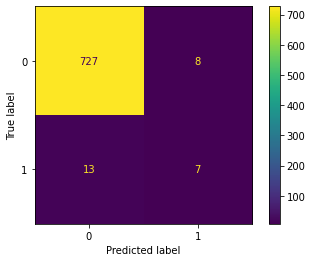

In [24]:
cm = confusion_matrix(y_test, y_predicted, labels=knn.classes_) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_) 

disp.plot() 

**Accuracy** 

In [25]:
results.loc['knn','accuracy']=accuracy_score(y_test,y_predicted) 

print(results.loc['knn','accuracy']) 

0.9721854304635762


**Balanced accuracy**

In [26]:
results.loc['knn','balanced_accuracy']=balanced_accuracy_score(y_test,y_predicted) 

print(results.loc['knn','balanced_accuracy']) 

0.6695578231292517


**Training time (in seconds)**

In [27]:
results.loc['knn','training_time']=knn.cv_results_['mean_fit_time'].mean() 

print(results.loc['knn','training_time']) 

0.0023887825012207037


**Prediction time (in seconds) per email**

In [28]:
results.loc['knn','prediction_time']=knn.cv_results_['mean_score_time'].mean()/len(y_test) 

print(results.loc['knn','prediction_time']) 

0.00020200986420081937


## 4.6 Train and evaluate KNN (SMOTE)  <a name="4-6"></a>

You will remember that the Enron dataset has an imbalance issue (that is, the amount of spam email is a very small proportion compared to the ham email). To correct this, we can use SMOTE, an oversampling technique that will produce a balanced training set. Run the code below to generate synthetic samples of the class “spam” and thereby balance the training set. 

In [29]:
X_train_smote, y_train_smote =SMOTE().fit_resample(X_train, y_train) 

After applying SMOTE, the training set is balanced and ready for training. Therefore, 50% of samples in the training set are spam. To check, let’s now count the proportion of spam emails in the dataset. Run the code below.

In [30]:
y_train_smote.count(1)/len(y_train_smote)

0.5

## 4.7 Train KNN (SMOTE) using hyperparameter tuning   <a name="4-7"></a>

Now let’s go through the same process as previously, but this time using the balanced dataset we have just created. Run the code below to train KNN.

In [31]:
knn.fit(X_train_smote, y_train_smote) 

print('Best p:', knn.best_estimator_.get_params()['p']) 

print('Best n_neighbors:', knn.best_estimator_.get_params()['n_neighbors']) 

Best p: 2
Best n_neighbors: 1


## 4.8 KNN (SMOTE) classifier evaluation   <a name="4-8"></a>

Now get the predicted labels from the balanced test set. Run the code below.

In [32]:
y_predicted = knn.predict(X_test) 

**Confusion matrix**

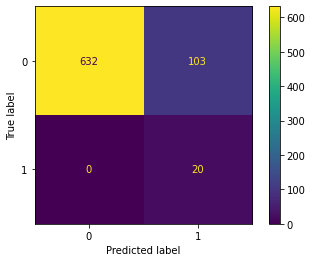

In [33]:
cm = confusion_matrix(y_test, y_predicted, labels=knn.classes_) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_) 

disp.plot() 

**Accuracy** 

In [34]:
results.loc['knn_SMOTE','accuracy']=accuracy_score(y_test,y_predicted) 

print(results.loc['knn_SMOTE','accuracy']) 

0.8635761589403973


**Balanced accuracy**

In [35]:
results.loc['knn_SMOTE','balanced_accuracy']=balanced_accuracy_score(y_test,y_predicted) 

print(results.loc['knn_SMOTE','balanced_accuracy']) 

0.9299319727891157


**Training time (in seconds)**

In [36]:
results.loc['knn_SMOTE','training_time']=knn.cv_results_['mean_fit_time'].mean() 

print(results.loc['knn_SMOTE','training_time']) 

0.004109539985656737


**Prediction time (in seconds) per email**

In [37]:
results.loc['knn_SMOTE','prediction_time']=knn.cv_results_['mean_score_time'].mean()/len(y_test) 

print(results.loc['knn_SMOTE','prediction_time']) 

0.0008923847627955558


# 5 Decision Tree and Hyperparameter Tuning  <a name="5-Decision"></a>

We will now move on from KNN and look at the same process for Decision Tree. First run the code below to define the Decision Tree classifier. 

In [38]:
dt = DecisionTreeClassifier() 

## 5.1 Apply grid search to Decision Tree  <a name="5-1"></a>

We first define the dictionary of hyperparameters (minimum samples for a node split, minimum samples for a leaf and maximum depth of tree) to be evaluated using grid search. In the following steps, we will find the best parameters among the parameters of this dictionary. 

In [39]:
hyperparameters = { 

    'min_samples_split': [2,3,5], 

    'min_samples_leaf': [5, 10, 20, 50, 100], 

    'max_depth': [2, 3, 5, 10, 20] 

} 

We’ll now use grid search to determine the best parameters according to the metric "accuracy". Run the code below to add the grid search technique to the classifier `dt`. 

In [40]:
dt = GridSearchCV(dt, hyperparameters, scoring='accuracy') 

## 5.2 Train and evaluate the Decision Tree classifier   <a name="5-2"></a>

Run the code below to train the Decision Tree classifier using hyperparameter tuning. 

In [41]:
dt.fit(X_train, y_train) 

print('Best max_depth:', dt.best_estimator_.get_params()['max_depth']) 

print('Best min_samples_leaf:', dt.best_estimator_.get_params()['min_samples_leaf']) 

print('Best criterion:', dt.best_estimator_.get_params()['criterion']) 

Best max_depth: 5
Best min_samples_leaf: 5
Best criterion: gini


## 5.3 Decision Tree classifier evaluation  <a name="5-3"></a>

To get the predicted labels from the test set, run the code below. 

In [42]:
y_predicted = dt.predict(X_test)

## 5.4 Metrics for evaluation of Decision Tree   <a name="5-4"></a>

Run the code below to produce different metrics for later comparison.

**Confusion matrix**

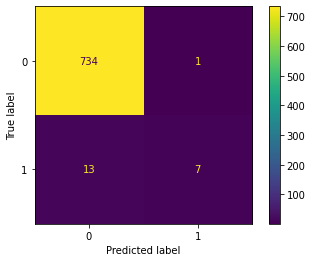

In [43]:
cm = confusion_matrix(y_test, y_predicted, labels=dt.classes_) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_) 

disp.plot() 

**Accuracy** 

In [44]:
results.loc['dt','accuracy']=accuracy_score(y_test,y_predicted) 

print(results.loc['dt','accuracy']) 

0.9814569536423841


**Balanced accuracy**

In [45]:
results.loc['dt','balanced_accuracy']=balanced_accuracy_score(y_test,y_predicted) 

print(results.loc['dt','balanced_accuracy']) 

0.6743197278911565


**Training time (in seconds)**

In [46]:
results.loc['dt','training_time']=dt.cv_results_['mean_fit_time'].mean() 

print(results.loc['dt','training_time']) 

0.05701817067464193


**Prediction time (in seconds) per email**

In [47]:
results.loc['dt','prediction_time']=dt.cv_results_['mean_score_time'].mean()/len(y_test) 

print(results.loc['dt','prediction_time']) 

2.871038003209937e-06


## 5.5 Train and evaluate Decision Tree using SMOTE    <a name="5-5"></a>

As we earlier trained KNN using SMOTE, let’s now train the Decision Tree using SMOTE and the balanced training set (X_train_smote, y_train_smote). Run the code below to train the Decision Tree classifier.  

In [48]:
dt.fit(X_train_smote, y_train_smote) 

print('Best max_depth:', dt.best_estimator_.get_params()['max_depth']) 

print('Best min_samples_leaf:', dt.best_estimator_.get_params()['min_samples_leaf']) 

print('Best criterion:', dt.best_estimator_.get_params()['criterion']) 

Best max_depth: 20
Best min_samples_leaf: 5
Best criterion: gini


## 5.6 Decision Tree (SMOTE) classifier evaluation    <a name="5-6"></a>

Now get the predicted labels from the balanced test set. Run the code below. 

In [49]:
y_predicted = dt.predict(X_test) 

## 5.7 Metrics for evaluation of Decision Tree (SMOTE)    <a name="5-7"></a>

**Confusion matrix**

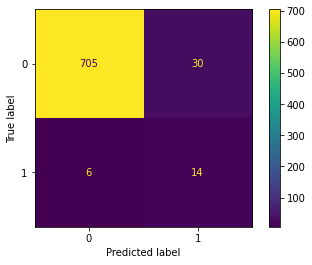

In [50]:
cm = confusion_matrix(y_test, y_predicted, labels=dt.classes_) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_) 

disp.plot() 

**Accuracy** 

In [51]:
results.loc['dt_SMOTE','accuracy']=accuracy_score(y_test,y_predicted) 

print(results.loc['dt_SMOTE','accuracy']) 

0.952317880794702


**Balanced accuracy**

In [52]:
results.loc['dt_SMOTE','balanced_accuracy']=balanced_accuracy_score(y_test,y_predicted) 

print(results.loc['dt_SMOTE','balanced_accuracy']) 

0.8295918367346938


**Training time (in seconds)**

In [53]:
results.loc['dt_SMOTE','training_time']=dt.cv_results_['mean_fit_time'].mean() 

print(results.loc['dt_SMOTE','training_time']) 

0.06482311566670734


**Prediction time (in seconds) per email**

In [54]:
results.loc['dt_SMOTE','prediction_time']=dt.cv_results_['mean_score_time'].mean()/len(y_test) 

print(results.loc['dt_SMOTE','prediction_time']) 

4.41248474794771e-06


# 6 Results of the implemented classifiers   <a name="6-Results"></a>

Finally, let’s see the results of the four implemented classifiers: KNN, decision trees and both classifiers using SMOTE to balance the dataset. To show the dataframe with the results of these four classifiers using the metrics (accuracy, balanced accuracy, training time and prediction time), run the code below. 

In [55]:
results 

,accuracy,balanced_accuracy,training_time,prediction_time
knn,0.972185,0.669558,0.002389,0.000202
knn_SMOTE,0.863576,0.929932,0.004110,0.000892
dt,0.981457,0.674320,0.057018,0.000003
dt_SMOTE,0.952318,0.829592,0.064823,0.000004


Let’s create a series of figures to display the metrics for the four classifiers. For now, we will just generate the values – we will consider how they compare in the next page in Canvas.

**Accuracy and balanced accuracy**

<AxesSubplot:>

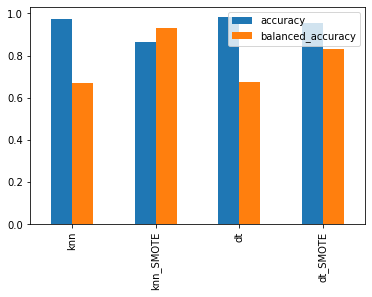

In [56]:
results[['accuracy','balanced_accuracy']].plot(kind="bar") 

**Training time (in seconds)**

<AxesSubplot:>

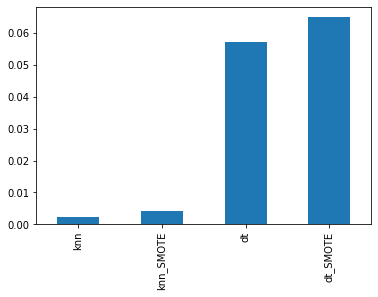

In [57]:
results['training_time'].plot(kind="bar") 

**Prediction time (in seconds) per email**

<AxesSubplot:>

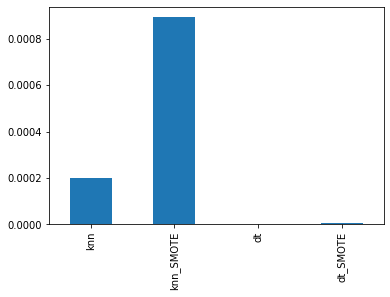

In [58]:
results['prediction_time'].plot(kind="bar") 

<div class="warning" style='padding:0.1em; background-color:#e6ffff'>
<span>
<p style='margin:1em;'>
<b>Congratulations!</b></p>
<p style='margin:1em;'>
You’ve now completed the modelling of the Enron dataset using a range of classification approaches. This will help you to tackle greater complexity in your data analysis, as well as model data that is qualitative rather than quantitative. These skills are important to your work in Assessment 3. To revise this activity, return to the Canvas page and read over the content under “What you’ll learn”.
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>